<b><font size="5">Learning Curve Examples</font><b>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning Curve
    
    Parameters
    ----------
    estimator : object type that implements and "fit" and predict methods
        An object of that type which is cloned for each validation.
        
        title : string
            Title for the chart.
            
        X : array-like, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and 
            n_features is the number of features.
            
        y : array-like, shape (n_samples) or (n_samples, n_features), optional
            Target relative to X for classification or regression;
            None for unsupervised learning.
        
        ylim : tuple, shape (ymin, ymax), optional
            Defines minimum and maximum yvalues plotted.
        
        cv : int, cross-validation generator or an iterable, optional
            Determines the cross-validation splitting strategy.
            Possible inputs for cv are:
            - None, to use the default 3-fold cross-validation.
            - integer, to specify the number of folds.
            - An object to be used as cross-validation generator
            - An iterable yielding train/test splits.
            
            For integer/None inputs, if 'y' is binary or multiclass,
            :class:'StratifiedKFold' used. If the estimator is not a classifier
            or if 'y' is neither binary nor multiclass, :class:'KFold' is used.
            
            Refer :ref:'User Guide <cross_validation>' for various
            cross-validators that can be used here.
            
        n_jobs : integer, optional
            Number of jobs to run in parallel (default 1).
        
    """
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,  train_sizes=train_sizes)
    train_score_mean = np.mean(train_scores, axis=1)
    train_score_std = np.std(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)
    test_score_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_score_mean - train_score_std,
                   train_score_mean + train_score_std, alpha=0.3,
                   color="r")
    plt.fill_between(train_sizes, test_score_mean - test_score_std,
                   test_score_mean + test_score_std, alpha=0.3,
                   color="g")
    plt.plot(train_sizes, train_score_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_score_mean, 'o-', color="g",
            label="Cross-Validation score")
    plt.legend(loc="best")
    return plt
    
    
    
    

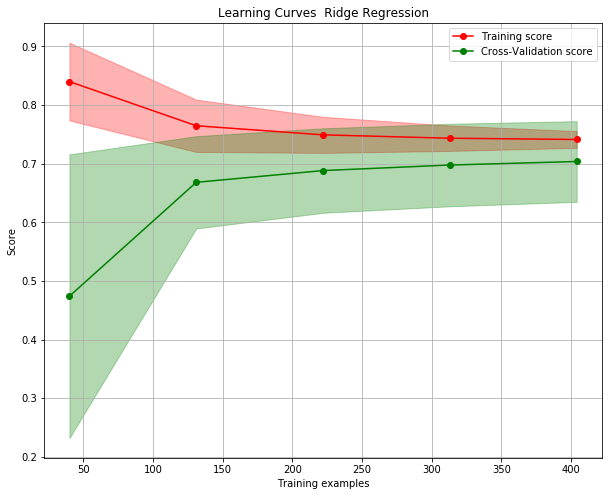

In [27]:
boston = load_boston()
X, y = boston.data, boston.target

title = "Learning Curves  Ridge Regression"

#Corss Validation with 100 iterations to get smoother mean test and train
#score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits = 100, test_size=0.2, random_state=0)
estimator = Ridge()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

<b><font size="5">Validation Curve Examples</font><b>

In [28]:
from sklearn.model_selection import validation_curve

In [30]:
boston = load_boston()
X, y = boston.data, boston.target

indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5,2,10)

train_scores, valid_scores = validation_curve(Ridge(),
                                             X, y,
                                             param_name,
                                             param_range)

/Users/anilkhadwal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [33]:
print(train_scores)
print(valid_scores)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.72640703 0.77391192 0.7309293 ]
 [0.72640703 0.77391192 0.7309293 ]
 [0.72640703 0.77391192 0.7309293 ]
 [0.72640699 0.77391189 0.73092922]
 [0.72640548 0.77391069 0.73092655]
 [0.72635725 0.77387245 0.73084278]
 [0.72538741 0.77312821 0.72932341]
 [0.72032696 0.76943512 0.72287716]
 [0.71416752 0.76362326 0.71674042]
 [0.70011294 0.74004635 0.70449303]]
[[0.75825408 0.645499   0.74868806]
 [0.75825395 0.64549862 0.74868864]
 [0.75825312 0.64549636 0.74869213]
 [0.75824818 0.6454828  0.74871288]
 [0.75821787 0.64540162 0.74883238]
 [0.75801702 0.64491977 0.74939305]
 [0.75656274 0.64243164 0.74989349]
 [0.75111957 0.6377505  0.7440888 ]
 [0.74306502 0.64498047 0.7320791 ]
 [0.72175238 0.6613021  0.70267403]]


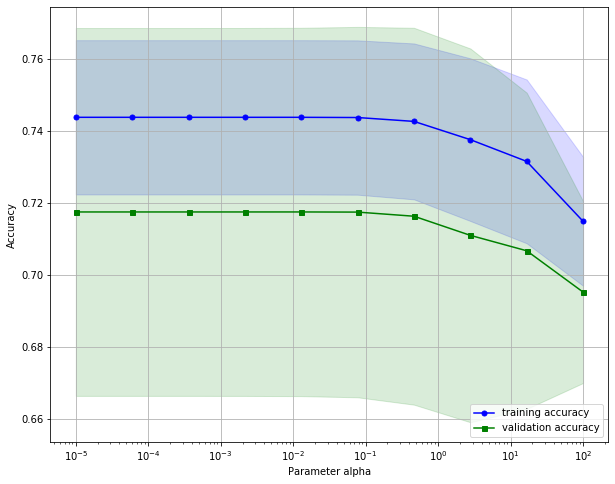

In [34]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                train_mean - train_std, alpha=0.15,
                color='blue')
plt.plot(param_range, test_mean,
        color='green', marker='s',
        markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std,
                test_mean - test_std, alpha=0.15,
                color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
plt.show()